In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)

In [2]:
dataset = pd.read_csv("dataset/USDTRY.csv")

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-13,3.51560,3.53001,3.51054,3.51570,3.51570,0.0
1,2017-06-14,3.51741,3.52105,3.48030,3.51734,3.51734,0.0
2,2017-06-15,3.48695,3.52434,3.48365,3.48865,3.48865,0.0
3,2017-06-16,3.51263,3.53057,3.50440,3.51300,3.51300,0.0
4,2017-06-19,3.50062,3.52251,3.48830,3.50050,3.50050,0.0


In [6]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1039,2021-06-07,8.67320,8.68624,8.59679,8.67300,8.67300,0.0
1040,2021-06-08,8.59620,8.62988,8.58001,8.59715,8.59715,0.0
1041,2021-06-09,8.60154,8.61863,8.56720,8.59970,8.59970,0.0
1042,2021-06-10,8.58470,8.59220,8.41730,8.58230,8.58230,0.0
1043,2021-06-11,8.41520,8.44420,8.28400,8.42520,8.42520,0.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1044 non-null   object 
 1   Open       1021 non-null   float64
 2   High       1021 non-null   float64
 3   Low        1021 non-null   float64
 4   Close      1021 non-null   float64
 5   Adj Close  1021 non-null   float64
 6   Volume     1021 non-null   float64
dtypes: float64(6), object(1)
memory usage: 57.2+ KB


In [8]:
dataset.isnull().sum()

Date          0
Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64

In [9]:
dataset = dataset.dropna(axis = 0)

In [10]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

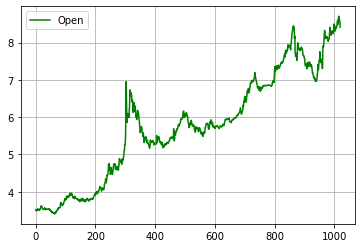

In [11]:
plt.figure()
plt.plot(dataset["Open"].values, color = "green" , label ="Open")
#plt.plot(dataset["Close"].values, color = "red", label ="Close" ,alpha = 0.3)
plt.legend()
plt.grid()
plt.show()

In [12]:
data = dataset["Open"].values.reshape(-1,1)
data.shape

(1021, 1)

In [13]:
#preproces
scaler = MinMaxScaler(feature_range=(0,1))
data_scale = scaler.fit_transform(data)
data_scale[:5]

array([[0.02067612],
       [0.02101758],
       [0.01527128],
       [0.02011583],
       [0.01785014]])

In [14]:
#trasn test size
cut_off = int(len(data) * 0.8)
train = data_scale[:cut_off]
test = data_scale[cut_off:]
print("Train size : {} - Test size : {}".format(train.shape[0], test.shape[0]))

Train size : 816 - Test size : 205


In [15]:
time_step = 50
output_size = 1
def x_y_preproces(datax):
    
    x = []
    y = []
    
    for i in range(len(datax) - time_step - output_size):
                          # i : i+20         , 0
        train_data = datax[i:(i + time_step), 0]
                            # i + 20
        train_label  = datax[ i + time_step , 0]
        
        x.append(train_data)
        y.append(train_label)
      
    x = np.array(x)
    y = np.array(y)
    
    return x , y 

In [16]:
x_train, y_train = x_y_preproces(train)
x_test, y_test = x_y_preproces(test)
print("x train :", x_train.shape)
print("y train :", y_train.shape)
print("x test :",x_test.shape)
print("y test :",y_test.shape)

x train : (765, 50)
y train : (765,)
x test : (154, 50)
y test : (154,)


In [17]:
#reshape (rows , timesteps = 1, cloumns)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test , (x_test.shape[0], 1, x_test.shape[1]))
print("x train :", x_train.shape)
print("x test :", x_test.shape)

x train : (765, 1, 50)
x test : (154, 1, 50)


In [18]:
#model LSTM

model = Sequential()
model.add(LSTM(16 , input_shape = (1 , x_train.shape[2]), return_sequences = True))
model.add(LSTM(8, return_sequences = False))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Dense(output_size))

hist = model.compile(loss = "mean_squared_error", optimizer = "adam")

In [144]:
#train
epochs = 75
batch_size = 1
model.fit(x_train , y_train, epochs = epochs , batch_size = batch_size )

Epoch 1/75
765/765 [==============================] - 4s 1ms/step - loss: 0.0291
Epoch 2/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 3/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 4/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0028
Epoch 5/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0032
Epoch 6/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 7/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0027
Epoch 8/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 9/75
765/765 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 10/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 11/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 12/75
765/765 [==============================] - 1s 1ms/step - loss: 0.0025
Epoch 13/75
765/765 [====

In [157]:
model.save("model_weight.h5")
model.load_weights("model_weight.h5")

In [19]:
#evulation
result = model.evaluate(x_test , y_test)

5/5 [==============================] - 13s 1ms/step - loss: 0.0049


In [20]:
#invert pred
x_data,y_data = x_y_preproces(data)
x_data = np.reshape(x_data, (x_data.shape[0], 1, x_data.shape[1]))

x_data_pred = model.predict(x_data)
train_pred = scaler.inverse_transform(x_data_pred)

In [23]:
last_100_days = train_pred[-100:,0]
last_100_days

array([8.59053  , 8.59053  , 8.59053  , 8.590529 , 8.590529 , 8.59053  ,
       8.59053  , 8.59053  , 8.5905285, 8.5905285, 8.5905285, 8.590528 ,
       8.590527 , 8.590526 , 8.590525 , 8.590525 , 8.590524 , 8.590525 ,
       8.590523 , 8.590523 , 8.590521 , 8.590521 , 8.590521 , 8.590523 ,
       8.590524 , 8.590525 , 8.590526 , 8.590528 , 8.590528 , 8.5905285,
       8.5905285, 8.59053  , 8.59053  , 8.590531 , 8.590532 , 8.590531 ,
       8.59053  , 8.59053  , 8.590531 , 8.590531 , 8.59053  , 8.59053  ,
       8.5905285, 8.590531 , 8.590532 , 8.590532 , 8.590532 , 8.590533 ,
       8.590534 , 8.590534 , 8.590534 , 8.590534 , 8.590534 , 8.590533 ,
       8.590533 , 8.590533 , 8.590534 , 8.590534 , 8.590534 , 8.590534 ,
       8.590533 , 8.590534 , 8.590534 , 8.590533 , 8.590533 , 8.590533 ,
       8.590533 , 8.590534 , 8.590534 , 8.590534 , 8.590533 , 8.590533 ,
       8.590533 , 8.590534 , 8.590534 , 8.590534 , 8.590534 , 8.590534 ,
       8.590534 , 8.590535 , 8.590535 , 8.590535 , 

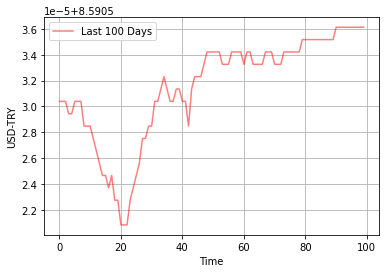

In [24]:
plt.figure()
plt.plot(last_15_days, color = "red", label ="Last 100 Days" ,alpha = 0.5)
plt.xlabel("Time")
plt.ylabel("USD-TRY")
plt.legend()
plt.grid()
plt.show()